In [ ]:
!cd drive/MyDrive/2021/HandsOnMachineLearning/main

**Ch4. 모델 훈련**

**4.1 선형 회귀**

In [ ]:
# 4.1.1 정규방정식
import numpy as np

# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [ ]:
# theta hat: 비용함수를 최소화하는 theta 값
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.52875086],
       [2.94775807]])

- y = 4 + 3x + (가우시안 노이즈)를 사용
- theta_best의 값이 4와 3과 유사하게 출력됨을 확인할 수 있다.
- 노이즈 때문에 정확한 예측은 하지못함

In [ ]:
# theta_best를 통한 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.52875086],
       [10.42426699]])

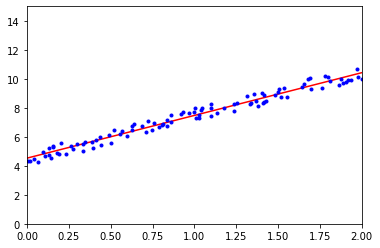

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# scikit learn으로 구현
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

print(lin_reg.predict(X_new))

[4.52875086] [[2.94775807]]
[[ 4.52875086]
 [10.42426699]]


**4.2 경사하강법**

In [ ]:
# 4.2.1 배치 경사 하강법
eta = 0.1 # 학습률, learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y) # 비용 함수의 편도함수
  theta = theta - eta * gradients # 경사하강법의 스텝 계산

print(theta)

[[4.52875086]
 [2.94775807]]


In [ ]:
# 4.2.2 확률적 경사 하강법
n_epochs = 50 # 반복횟수
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
  # m: 샘플의 수
  for i in range(m):
    # 무작위로 샘플 선별
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]

    # 경사도 계산
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

print(theta)

[[4.52302147]
 [2.94747422]]


In [ ]:
# scikit-learn SGD
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.51910826] [2.9522243]


**4.3 다항 회귀**

In [ ]:
# 이차방정식을 사용한 다항회귀 예제
# 이차방정식으로 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # y = 0.5X^2 + X + 2 + 노이즈

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 2차방정식이기 때문에 X의 값을 제곱하여 새로운 특성으로 추가시켜주는 방식으로 데이터 셋 변형한다.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# X_poly의 데이터 셋에 기존 데이터의 제곱값이 특성으로 추가되어있다.
print(X[0])
print(X_poly[0])

[-1.39103874]
[-1.39103874  1.93498877]


In [ ]:
# 선형회귀로 학습
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.96134552] [[0.85442277 0.49146313]]


**4.4 학습 곡선**

In [ ]:
# 모델의 학습곡선 예시
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 모델의 학습곡선을 그리는 함수
def plot_learning_curves(model, X, y):
  # 훈련 데이터 셋 분리
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    # 매 스텝에서 크기가 다른 서브셋으로 훈련 후 예측
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)

    # mse 계산
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  
  # mse -> rmse로 값 변환 후 그래프 출력
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val set")

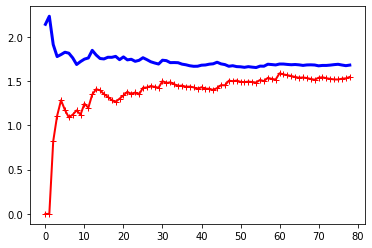

In [ ]:
# 학습곡선 출력
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 훈련 데이터 셋의 크기가 늘어남에 따라서 검증오차가 줄어들고 그래프가 편평해짐
- 높은 오차로 학습이 수렴한다. -> 과소적합

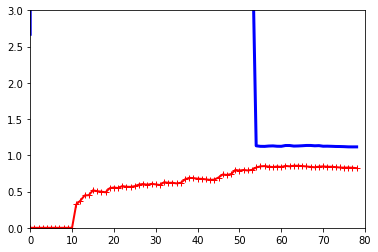

In [ ]:
# polynomial features degree=10으로 10차 다항 회귀 모델의 학습 곡선을 출력
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# 그래프 출력 제한
plt.axis([0, 80, 0, 3])
plt.show()

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.

- 훈련 세트와 테스트 세트의 오차 결과 사이에 간격이 클수록 과대적합을 의심할 수 있다.
  
  -> 더 큰 훈련 세트를 사용할 수록 두 곡선이 더 가까워진다. (과대적합 해소)

**4.5 규제가 있는 선형 모델**

4.5.1 릿지회귀

- 릿지 회귀의 비용함수

- $ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2 $


ɑ: 규제항, 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다.
  - 0이면 선형회귀와 같아지고, 크기가 아주 크면 모든 가중치가 0에 가까워지고 데이터의 평균을 지나는 수평선이 된다.

In [ ]:
# 릿지회귀
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

[[4.6408128]]


In [ ]:
# 확률적 경사 하강법 사용
sgd_reg = SGDRegressor(max_iter=1000, penalty="l2") # l2는 SGD 비용 함수에 가중치 벡터의 l₂ 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다. - 릿지회귀
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[4.60964236]


4.5.2 라쏘 회귀

- 라쏘 회귀 비용함수

- $ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| $



In [ ]:
# 라쏘회귀
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))

[4.59602071]


In [ ]:
# SGDRessressor(penaly="l1")
sgd_reg = SGDRegressor(max_iter=1000, penalty="l1")
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[4.61456219]


4.5.3 엘라스틱넷
- 엘라스틱넷 비용함수
- $ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2} $


In [ ]:
# 엘라스틱넷
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.60175246])

In [ ]:
# 4.5.4 조기 종료
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# 데이터 스케일 조정 파이프라인 설정
poly_scaler = Pipeline([
                        ("poly_feature", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])

# 데이터 스케일 조정
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# SGDRegressor
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  # 매 step마다 mse 오차 계산해서 최소 오차율보다 더 작으면 해당 스텝의 모델을 최솟값으로 저장한다.
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [ ]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.00994429] [ 1.04818208e+00  1.18389295e+00  2.72562122e-01  5.79883029e-01
  1.35526390e-01  2.57386150e-01  9.41509114e-02  8.84064892e-02
  5.83201968e-02 -1.43956178e-03  2.27008945e-02 -5.13433557e-02
 -8.09667976e-03 -8.01553176e-02 -3.17691187e-02 -9.67842401e-02
 -4.82637768e-02 -1.05631339e-01 -5.85496430e-02 -1.09101027e-01
 -6.38631191e-02 -1.08691787e-01 -6.53746258e-02 -1.05454568e-01
 -6.40766509e-02 -1.00184085e-01 -6.07682669e-02 -9.35020239e-02
 -5.60751017e-02 -8.58981571e-02 -5.04784850e-02 -7.77554274e-02
 -4.43437357e-02 -6.93687024e-02 -3.79444780e-02 -6.09604687e-02
 -3.14825557e-02 -5.26944323e-02 -2.51040087e-02 -4.46872656e-02
 -1.89117737e-02 -3.70185894e-02 -1.29757345e-02 -2.97392937e-02
 -7.34064508e-03 -2.28783517e-02 -2.03235348e-03 -1.64483082e-02
  2.93733321e-03 -1.04496384e-02  7.56686604e-03 -4.87416263e-03
  1.18620324e-02  2.92309642e-04  1.58337158e-02  5.06795836e-03
  1.94961927e-02  9.47342598e-03  2.28658505e-02  1.35306798e-02
  2.59602333

**4.6 로지스틱 회귀**

In [ ]:
# 4.6.3 결정 경계
from sklearn import datasets

# iris dataset load
iris = datasets.load_iris()
print(list(iris.keys()))

X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)  # 1: Iris-virginica, 0: 그외

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [ ]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

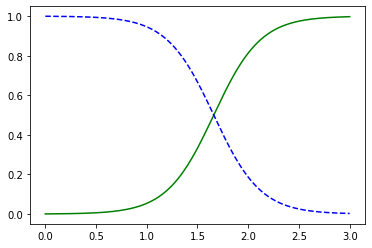

In [ ]:
# 꽃잎의 너비가 0~3cm인 꽃에 대한 모델의 추정 확률 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Non Iris-Virginica")

plt.show()

In [ ]:
# 1.6 근처에서 결정 경계가 발생
log_reg.predict([[1.7], [1.5]])

array([1, 0])

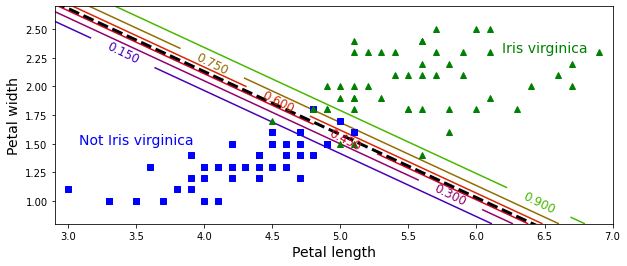

In [ ]:
# 선형 결정 경계 그래프 출력
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

- 꽃잎의 너비 0.6 부근에서 결정 경계 발생하는 것을 확인할 수 있다.

In [ ]:
# 4.6.4 소프트맥스 회귀
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
